In [28]:
%load_ext autoreload
%autoreload 2


import ecmwf.data as ecdata
from ecmwf.opendata import Client
from pathlib import Path
from ecmwf_downloader.config.config import Config
from ecmwf_downloader import helpers as h
import shutil
import os



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


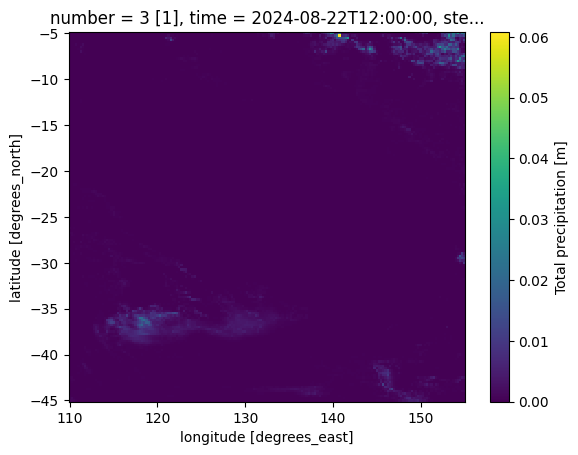

In [52]:
import xarray as xr

ds = xr.open_dataset(
    '/Users/sho108/Desktop/x/Projects/ECMWF/cron_job_downloads/tp/pf_20240822.nc'
)


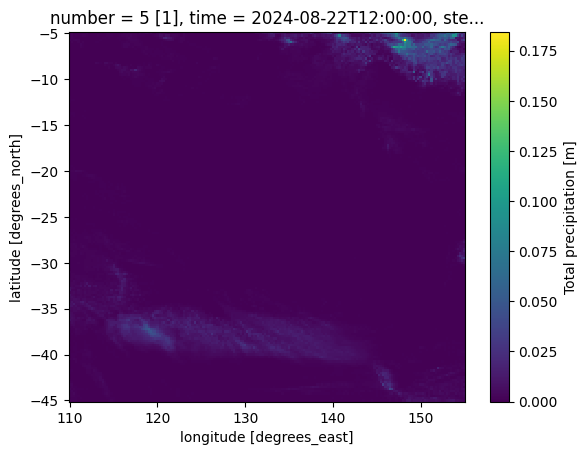

In [66]:
ds.isel(time=1, number=4, step=6).tp.plot()

In [41]:
config = Config(look_back=-2)
config['source'] = 'aws'

In [45]:
config

{'time': [0, 12], 'type': ['cf'], 'step': [0, 24, 48, 72], 'param': ['tp'], 'date': -1, 'stream': 'enfo', 'source': 'aws', 'temp_filename': './temp.grib', 'save_dir': None, 'look_back': 2, 'date_format': '%Y%m%d', 'name': 'data', 'area': [-5.0, 110.0, -45.0, 155.0], 'save_grib': False, 'save_netcdf': True}

In [42]:
temp_filename = Path(config['temp_filename'])
temp_filename.parent.mkdir(exist_ok=True)
client = Client(source=config['source'])


In [44]:
r = config.request
r = {'time': [0, 12], 'step':[0, 24, 48], 'type': ['pf'], 'date': -1, 'stream': 'enfo', 'param':'cape'}

client.retrieve(r, temp_filename)
data = ecdata.read(str(temp_filename))

data.ls()

set() ['cf', 'pf']
set() ['0', '24', '48']
set() ['100u', '100v', '10u', '10v', '2d', '2t', 'asn', 'cape', 'd', 'gh', 'lsm', 'msl', 'q', 'r', 'ro', 'skt', 'sp', 'ssr', 'ssrd', 'st', 'stl2', 'stl3', 'stl4', 'str', 'strd', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 'tcwv', 'tp', 'ttr', 'u', 'v', 'vo', 'w']


<multiple>:   0%|          | 0.00/220M [00:00<?, ?B/s]

KeyboardInterrupt: 